C:\Users\doshi\AppData\Local\Temp\ipykernel_3868\3794704916.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette="viridis")


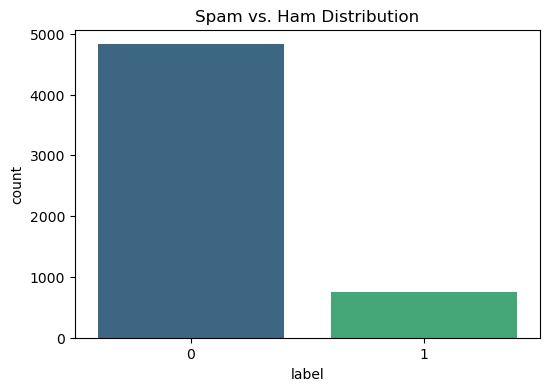

=== Logistic Regression ===
Accuracy: 96.86%

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.99      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115


Confusion Matrix:
 [[965   1]
 [ 34 115]]

=== Naive Bayes ===
Accuracy: 95.61%

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       966
           1       1.00      0.67      0.80       149

    accuracy                           0.96      1115
   macro avg       0.98      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115


Confusion Matrix:
 [[966   0]
 [ 49 100]]

=== Support Vector Machine ===
Accuracy: 98.83%

Classification Report:
               precision    recall  f1-score   support


Enter an email (or type 'exit' to quit):  You have been selected for a free vacation! Click here.


Classification: Ham


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

df = pd.read_csv("spam.csv", encoding="latin-1")

df = df[['Category', 'Message']]
df.columns = ['label', 'message']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub(r'\d+', '', text)  
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['message'] = df['message'].apply(preprocess_text)

plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette="viridis")
plt.title("Spam vs. Ham Distribution")
plt.show()

X = df["message"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_pipeline = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("tfidf", TfidfTransformer()),
    ("classifier", LogisticRegression())
])

naive_bayes_pipeline = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("tfidf", TfidfTransformer()),
    ("classifier", MultinomialNB())
])

svm_pipeline = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("tfidf", TfidfTransformer()),
    ("classifier", SVC(kernel="linear"))
])

logistic_pipeline.fit(X_train, y_train)
naive_bayes_pipeline.fit(X_train, y_train)
svm_pipeline.fit(X_train, y_train)

logistic_pred = logistic_pipeline.predict(X_test)
naive_bayes_pred = naive_bayes_pipeline.predict(X_test)
svm_pred = svm_pipeline.predict(X_test)

print("=== Logistic Regression ===")
print(f"Accuracy: {accuracy_score(y_test, logistic_pred) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, logistic_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, logistic_pred))

print("\n=== Naive Bayes ===")
print(f"Accuracy: {accuracy_score(y_test, naive_bayes_pred) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, naive_bayes_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, naive_bayes_pred))

print("\n=== Support Vector Machine ===")
print(f"Accuracy: {accuracy_score(y_test, svm_pred) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, svm_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, svm_pred))

joblib.dump(logistic_pipeline, "logistic_model.pkl")
joblib.dump(naive_bayes_pipeline, "naive_bayes_model.pkl")
joblib.dump(svm_pipeline, "svm_model.pkl")

def classify_email(email, model):
    processed_email = preprocess_text(email)
    prediction = model.predict([processed_email])[0]
    return "Spam" if prediction == 1 else "Ham"

loaded_model = joblib.load("logistic_model.pkl")

while True:
    test_email = input("\nEnter an email (or type 'exit' to quit): ")
    if test_email.lower() == 'exit':
        break
    print(f"Classification: {classify_email(test_email, loaded_model)}")
